C:\Users\tanzi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


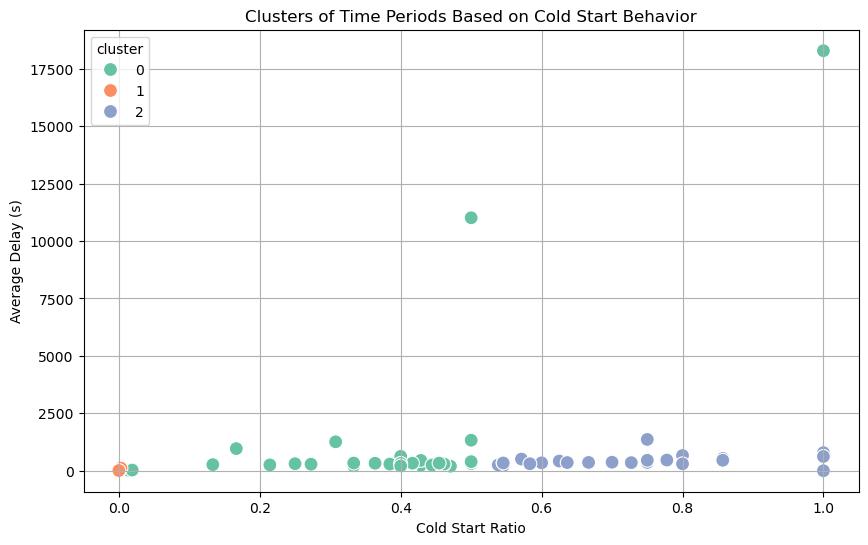

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load cleaned data
df = pd.read_csv(r"C:\Users\tanzi\Personal Projects\cold_start_project_498r\data\clean_data.csv")

# Group by time features to get cold start pattern
agg_df = df.groupby(['hour', 'dayofweek', 'time_bucket']).agg(
    total_invocations=('Cold_Start', 'count'),
    cold_starts=('Cold_Start', 'sum'),
    avg_delay=('Delay (s)', 'mean')
).reset_index()

# Calculate cold start ratio
agg_df['cold_start_ratio'] = agg_df['cold_starts'] / agg_df['total_invocations']

# Select features for clustering
features = agg_df[['avg_delay', 'cold_start_ratio', 'total_invocations']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
agg_df['cluster'] = kmeans.fit_predict(scaled_features)

# Save aggregated cluster-labeled data
agg_df.to_csv('../data/clustered_time_patterns.csv', index=False)

# Visualize clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=agg_df, x='cold_start_ratio', y='avg_delay', hue='cluster', palette='Set2', s=100)
plt.title("Clusters of Time Periods Based on Cold Start Behavior")
plt.xlabel("Cold Start Ratio")
plt.ylabel("Average Delay (s)")
plt.grid(True)
plt.show()
